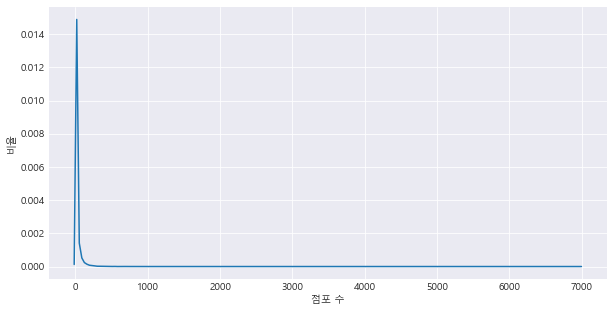

In [13]:
# Install pip packages in the current Jupyter kernel

import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib==3.0.3
# !{sys.executable} -m pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우를 제거 
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 라인
%matplotlib inline
# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 함
import os
os.getcwd() # 현재 디렉토리 파악
os.chdir(r"D:\heeju\특화 프로젝트\DataAnalysis\file") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# 한글이 들어간 csv는 encoding 인자를 넣어주는 것이 좋음
df=pd.read_csv("서울시 상권분석서비스(점포-행정동).csv",encoding='euc-kr') 
df.head()

# 데이터 shape 파악
df.shape


In [20]:
# 데이터 통계량 파악
df.describe()

,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
count,105908.000000,105908.000000,105908.000000,105908.000000,105908.000000,105908.000000,105908.000000
mean,16.232334,17.499009,2.213950,0.386826,2.715262,0.498971,1.266675
std,59.043745,60.195313,7.680154,1.284714,9.434929,1.858825,4.981099
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6978.000000,6989.000000,100.000000,47.000000,200.000000,215.000000,176.000000


In [19]:
# 결측치 개수 파악
# 셀 실행 결과를 데이터프레임으로 보고 싶을 때 to_frame()과 pd.DataFrame() 두 가지를 사용 가능
df.isnull().sum().to_frame('nan_count')


,nan_count
기준_년분기_코드,0
행정동_코드,0
행정동_코드_명,0
서비스_업종_코드,0
서비스_업종_코드_명,0
점포_수,0
유사_업종_점포_수,0
개업_율,0
개업_점포_수,0
폐업_률,0


In [18]:
# 결측치 비율 파악
pd.DataFrame(data=df.isnull().sum()/len(df),columns=['nan_ratio'])

,nan_ratio
기준_년분기_코드,0.0
행정동_코드,0.0
행정동_코드_명,0.0
서비스_업종_코드,0.0
서비스_업종_코드_명,0.0
점포_수,0.0
유사_업종_점포_수,0.0
개업_율,0.0
개업_점포_수,0.0
폐업_률,0.0


In [17]:
# 변수 타입 파악
df.dtypes

기준_년분기_코드      object
행정동_코드         object
행정동_코드_명       object
서비스_업종_코드      object
서비스_업종_코드_명    object
점포_수            int64
유사_업종_점포_수      int64
개업_율            int64
개업_점포_수         int64
폐업_률            int64
폐업_점포_수         int64
프랜차이즈_점포_수      int64
dtype: object

In [16]:
#범주형 변수 : 빈도(frequency) 계산 가능
#연속형 변수 : 평균, 표준편차, 분산 등의 수학적 계산 가능
df['기준_년분기_코드']=df['기준_년분기_코드'].astype(str)
df['행정동_코드']=df['행정동_코드'].astype(str)

In [15]:
# 분석 결과의 이해를 돕기위해 데이터 단위를 바꿔줄 수도 있다.
# 현재 예시 df에서 trip_duration은 second 단위여서 직관적으로 와닿지 않는다.
# df['trip_duration_min']=df['trip_duration'] /60

#통계량 파악
df['점포_수'].describe()

count    105908.000000
mean         16.232334
std          59.043745
min           0.000000
25%           2.000000
50%           6.000000
75%          14.000000
max        6978.000000
Name: 점포_수, dtype: float64

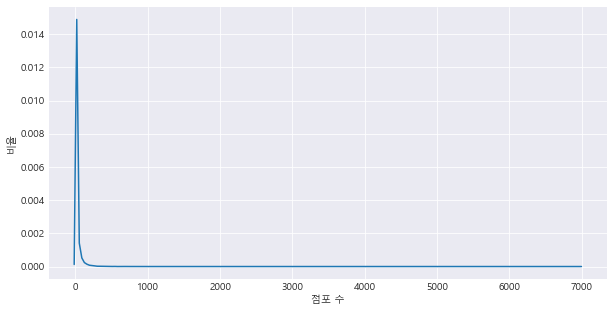

In [14]:
# kdeplot
# 빈 캔버스 사이즈 지정
plt.figure(figsize=(10,5))

# 캔버스에 그림 그리기
kde=sns.kdeplot(df['점포_수']) 
kde.set_xlabel("점포 수")
kde.set_ylabel("비율")

# 다 그려진 캔버스 보여주기
plt.show()

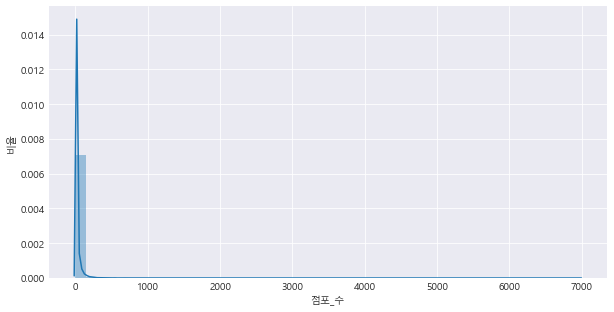

Skewness: 53.122408
Kurtosis: 5321.453351


In [23]:
# distplot, shade 연한 하늘색 네모가 histogram입니다
plt.figure(figsize=(10,5)) # 빈 캔버스 사이즈 지정
dist=sns.distplot(df['점포_수']) # kde=False를 넣어보자
dist.set_xlabel("점포_수")
dist.set_ylabel("비율")
plt.show() # 다 그려진 캔버스 보여주기

#skewness and kurtosis
print("Skewness: %f" % df['점포_수'].skew())
print("Kurtosis: %f" % df['점포_수'].kurt())

In [34]:
# 이상치를 제거
# 상위 99% 값을 cut_point로 지정
cut_point = df["점포_수"].quantile(0.99)
df_cut=df[df['점포_수'] < cut_point]

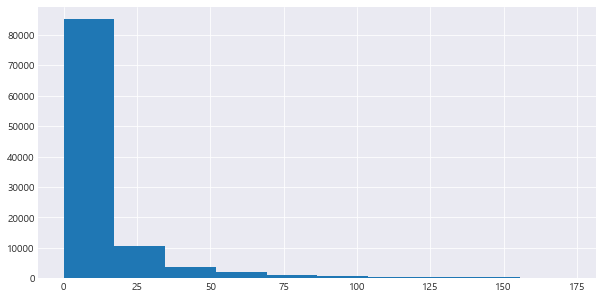

In [35]:
# 단순 pandas visualization 활용!
plt.figure(figsize=(10,5))
df_cut['점포_수'].hist()
plt.show()

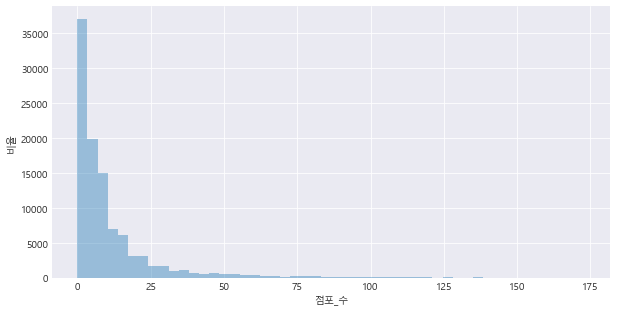

눈에 띄는 치우침 정도가 있는가 Skewness: 53.122408
얼마나 뾰족한가 Kurtosis: 5321.453351


In [38]:
# seaborn의 distplot, shade 연한 하늘색 네모가 histogram
plt.figure(figsize=(10,5)) # 빈 캔버스 사이즈 지정
dist=sns.distplot(df_cut['점포_수'],kde=False) # kde=False를 넣어보자
dist.set_xlabel("점포_수")
dist.set_ylabel("비율")
plt.show() # 다 그려진 캔버스 보여주기

#skewness and kurtosis
print("눈에 띄는 치우침 정도가 있는가 Skewness: %f" % df['점포_수'].skew())
print("얼마나 뾰족한가 Kurtosis: %f" % df['점포_수'].kurt())